In [3]:
import sys
from rdkit import rdBase, Chem, Geometry
from rdkit.Chem import AllChem, Draw
print('RDKit version: ',rdBase.rdkitVersion)

def smi_tokenizer(smi):
    """
    Tokenize a SMILES molecule or reaction
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens)
    return tokens

def smiles_to_files(smiles, elements_filename='elements.txt', connections_filename='connections.txt', alt_elements_filename='two_d_elements.txt'):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        raise ValueError("Invalid SMILES string")
    smi_explicit = Chem.MolToSmiles(mol, allBondsExplicit=True)
    print(smi_tokenizer(smi_explicit))
    print(smi_explicit)

RDKit version:  2023.09.4


In [8]:
smiles_to_files("C1=CC=C(C=C1)Cl")

['Cl', '-', 'c', '1', ':', 'c', ':', 'c', ':', 'c', ':', 'c', ':', 'c', ':', '1']
Cl-c1:c:c:c:c:c:1


In [9]:
smiles_to_files("[K+].[O-]C(=O)Cc1cc[nH]c1")


['O', '=', 'C', '(', '-', '[O-]', ')', '-', 'C', '-', 'c', '1', ':', 'c', ':', 'c', ':', '[nH]', ':', 'c', ':', '1', '.', '[K+]']
O=C(-[O-])-C-c1:c:c:[nH]:c:1.[K+]


In [10]:
smiles_to_files("C#C")

['C', '#', 'C']
C#C


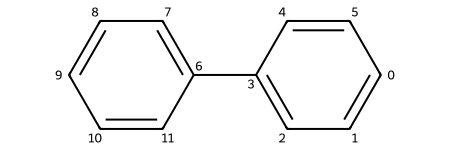

In [17]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
"C1=CC=C(C=C1)C2=CC=CC=C2"
mol = Chem.MolFromSmiles("C1=CC=C(C=C1)C2=CC=CC=C2")
mol
"C0=C1C2=C3-C4...C4-C3=C10C11"

In [18]:
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol())

0 C
1 C
2 C
3 C
4 C
5 C
6 C
7 C
8 C
9 C
10 C
11 C
